In [432]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import ROOT_DIR
sns.set(rc={'figure.figsize':(10,5)})

In [433]:
def pi_bytes(log_path):

    log_path = os.path.join(log_path, 'pi_logs')
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plt.suptitle('Network traffic')
    ticks = None
    time_arr = None
    labels = []
    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            mb_sent = (df['bytes_sent'] - df['bytes_sent'][0]) * 1e-6
            axes[0].plot(mb_sent)
            labels.append(f'Pi{log[5:-4]}')
            if ticks is None:
                time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))
                time = int(time.total_seconds() / 60)
                ticks = np.arange(0, len(df), int(len(df)/5))
                time_arr = np.arange(0, time, time / len(ticks), dtype=int)

    axes[0].set_xticks(ticks)
    axes[0].set_xticklabels(time_arr)
    axes[0].set_ylabel('Sent data in Mbyte')

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            mb_sent = (df['bytes_recv'] - df['bytes_recv'][0]) * 1e-6
            axes[1].plot(mb_sent)

    axes[1].set_xticks(ticks)
    axes[1].set_xticklabels(time_arr)
    axes[1].set_ylabel('Received data in Mbyte')

    fig.text(0.5, 0, 'Time in minutes', ha='center', va='center')

    lgd = fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)
    plt.tight_layout()
    plt.savefig('figures/bytes.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [434]:
def pi_cpu(log_path):
    log_path = os.path.join(log_path, 'pi_logs')
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plt.suptitle('CPU information')
    ticks = None
    time_arr = None
    labels = []

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_user = (df['cpu0_user'] + df['cpu1_user'] + df['cpu2_user'] + df['cpu3_user']) / 4
            axes[0].plot(cpu_user)
            labels.append(f'Pi{log[5:-4]}')
            if ticks is None:
                time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))
                time = int(time.total_seconds() / 60)
                ticks = np.arange(0, len(df), int(len(df) / 5))
                time_arr = np.arange(0, time, time / len(ticks), dtype=int)

    axes[0].set_xticks(ticks)
    axes[0].set_xticklabels(time_arr)
    axes[0].set_ylabel('CPU usage in %')

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_freq = (df['cpu0_freq'] + df['cpu1_freq'] + df['cpu2_freq'] + df['cpu3_freq']) / 4 / 1000
            axes[1].plot(cpu_freq)

    axes[1].set_xticks(ticks)
    axes[1].set_xticklabels(time_arr)
    axes[1].set_ylabel('CPU frequency in GHz')

    fig.text(0.5, 0, 'Time in minutes', ha='center', va='center')

    lgd = fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)
    plt.tight_layout()
    plt.savefig('figures/cpu.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [435]:
def pi_box_usage(log_path):
    log_path = os.path.join(log_path, 'pi_logs')

    usage_dict = {}
    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_user = (df['cpu0_user'] + df['cpu1_user'] + df['cpu2_user'] + df['cpu3_user']) / 4
            usage_dict[f'Pi{log[5:-4]}'] = cpu_user

    fig, ax = plt.subplots()
    ax.boxplot(usage_dict.values())
    ax.set_xticklabels(usage_dict.keys(), rotation = 45)
    ax.set_ylabel('Average usage in %')
    plt.tight_layout()
    plt.savefig('figures/cpu_box_usage.svg')
    plt.show()


In [436]:
def pi_box_freq(log_path):
    log_path = os.path.join(log_path, 'pi_logs')

    freq_dict = {}
    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            cpu_freq = (df['cpu0_freq'] + df['cpu1_freq'] + df['cpu2_freq'] + df['cpu3_freq']) / 4 / 1000
            freq_dict[f'Pi{log[5:-4]}'] = cpu_freq

    fig, ax = plt.subplots()
    ax.boxplot(freq_dict.values())
    ax.set_xticklabels(freq_dict.keys(), rotation = 45)
    ax.set_ylabel('Average frequency in GHz')
    plt.tight_layout()
    plt.savefig('figures/cpu_box_freq.svg')
    plt.show()

In [437]:
def pi_ram(log_path):
    log_path = os.path.join(log_path, 'pi_logs')
    fig, axes = plt.subplots(1, 1, figsize=(10, 4))
    plt.suptitle('RAM information')
    ticks = None
    time_arr = None
    labels = []

    for i, log in enumerate(os.listdir(log_path)):
        if 'power' not in log:
            df = pd.read_csv(os.path.join(log_path, log))
            ram_usage = df['memory_used'] * 1e-6
            axes.plot(ram_usage)
            labels.append(f'Pi{log[5:-4]}')
            if ticks is None:
                time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))
                time = int(time.total_seconds() / 60)
                ticks = np.arange(0, len(df), int(len(df) / 5))
                time_arr = np.arange(0, time, time / len(ticks), dtype=int)

    axes.set_xticks(ticks)
    axes.set_xticklabels(time_arr)
    axes.set_ylabel('Ram usage in MBytes')

    fig.text(0.5, 0, 'Time in minutes', ha='center', va='center')

    lgd = fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)
    plt.tight_layout()
    plt.savefig('figures/ram.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [438]:
def pi_power(log_path):
    log_path = os.path.join(log_path, 'pi_logs')
    df = pd.read_csv(os.path.join(log_path, 'raspi_power.csv'))
    time = (datetime.fromisoformat(df['time'].iloc[-1]) - datetime.fromisoformat(df['time'].iloc[0]))
    df = df.mean(axis=0)
    power = []
    pis = []
    for i, column in enumerate(df.index):
        if 'power' in column:
            power.append(df[column] / 1000)
            pis.append(f'Pi{column[5:-6]}')

    df = pd.DataFrame({
        'Watts per hour (Wh)': power,
        ' ': pis
    })
    sns.set(rc={'figure.figsize':(10,5)})
    ax = sns.barplot(x=' ', y='Watts per hour (Wh)', data=df, palette="Blues_d")

    for index, row in df.iterrows():
        ax.text(row.name, round(row.values[0], 2), round(row.values[0], 2), color='black', ha="center")

    print(f'Watts: {sum(power)} Training: {time}')
    plt.tight_layout()
    plt.savefig('figures/power_consumption.svg')
    plt.show()

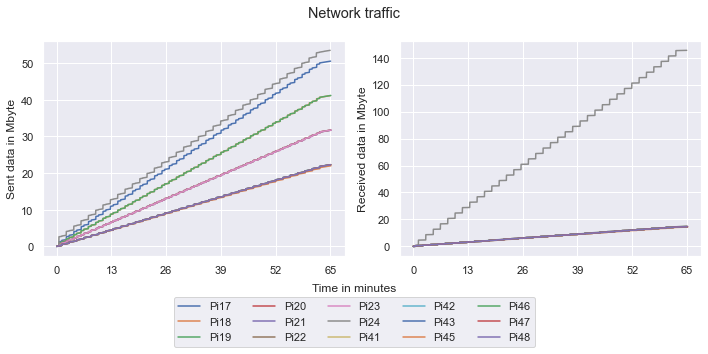

In [439]:
log_dir = os.path.join(ROOT_DIR, "models/Federated_16_LSTM_SGD_CrossEntropyLoss_CLASS_12_[RandomAugment_ACPower_MFCC]_Syn/lr-0.045_wd-0.001_nl-1_ss-23_te-100_le-1")
pi_bytes(log_dir)

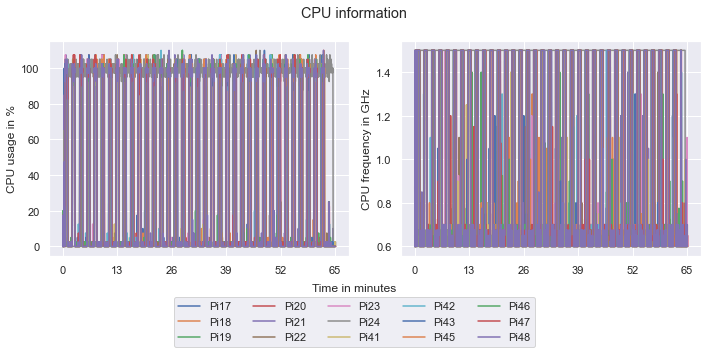

In [440]:
pi_cpu(log_dir)

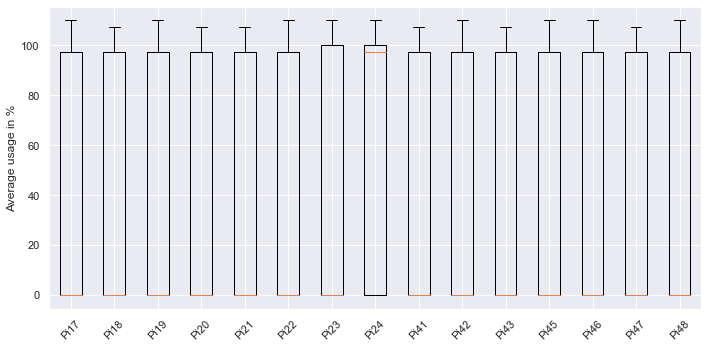

In [441]:
pi_box_usage(log_dir)

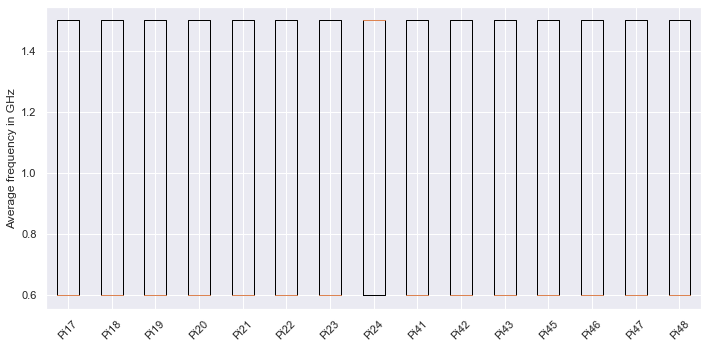

In [442]:
pi_box_freq(log_dir)

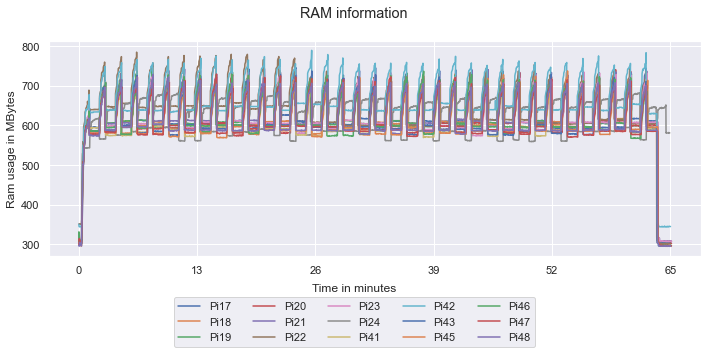

In [443]:
pi_ram(log_dir)

Watts: 67.24615384615385 Training: 1:16:04.280728


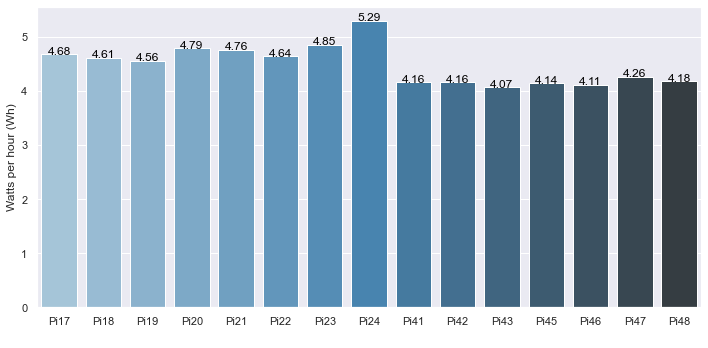

In [444]:
pi_power(log_dir)